In [267]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.ticker as ticker
import seaborn as sns
from copy import deepcopy

In [111]:
# Own implementations
%load_ext autoreload
%autoreload 2
from data_generation import *

# Misc
import sys
sys.path.insert(0, '../misc')
from plots import *

plt.style.use('../misc/report.mplstyle')
save_dir = "../../../tex/01_regression_resampling/img/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [193]:
save=True

In [337]:
def plot_franke_3d(ax, X, Y, fXY, x=None, y=None, z=None, zmin=0, zmax=1, **kwargs):
    
    ax.plot_surface(X, Y, fXY, **kwargs, vmin=np.min(fXY), vmax=np.max(fXY))
    if x is not None and y is not None and z is not None:
        ax.scatter(x[lower],y[lower],z[lower],zorder=20,alpha=0.8,s=2,color="blue",marker="v")
        ax.scatter(x[higher],y[higher],z[higher],zorder=20,alpha=1,s=2,color="red",marker="^")
    
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    ax.set_zlim([zmin,zmax])
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.text(-0.1,-0.1,1.2,r"$z$")

    # Hack to change axis origin. matplotlib really shows that it is not
    # meant for 3d plotting at this point:(
    tmp_planes = ax.xaxis._PLANES 
    ax.xaxis._PLANES = ( tmp_planes[0], tmp_planes[0], 
                         tmp_planes[1], tmp_planes[0], 
                         tmp_planes[0], tmp_planes[0])

    tmp_planes = ax.yaxis._PLANES 
    ax.yaxis._PLANES = ( tmp_planes[1], tmp_planes[0], 
                         tmp_planes[0], tmp_planes[0], 
                         tmp_planes[0], tmp_planes[0])

    tmp_planes = ax.zaxis._PLANES 
    ax.zaxis._PLANES = ( tmp_planes[1], tmp_planes[0], 
                         tmp_planes[0], tmp_planes[0], 
                         tmp_planes[0], tmp_planes[0])

    ax.view_init(15,53)

    ax.grid(False)
    for a in [ax.xaxis, ax.yaxis, ax.zaxis]:
        a.set_major_locator(ticker.FixedLocator([1]))
    ax.zaxis.set_major_locator(ticker.FixedLocator([zmin,zmax]))
    #ax.axes.zaxis.set_ticklabels([1])

    ax.tick_params(axis='both', which='major', pad=0)
    return ax

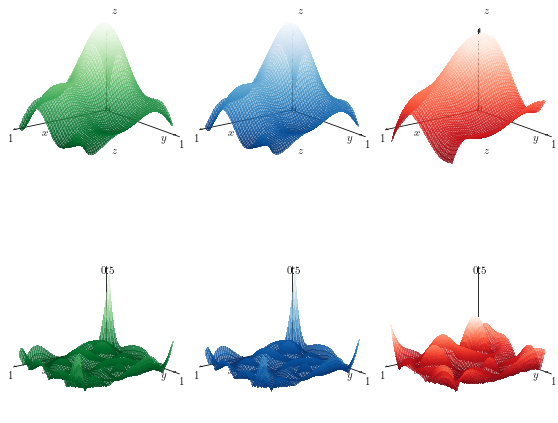

In [338]:
# Load trained, optimal predictors (Predictor instance) 
# and models (design matrix specs) from 0{1,2,3}_*_ notebooks
%store -r ols_opt
%store -r ols_popt_cv
%store -r ridge_opt
%store -r ridge_popt_cv
%store -r lasso_opt
%store -r lasso_popt_bs

N_uniform = 100
x = np.linspace(0,1,N_uniform)
y = np.linspace(0,1,N_uniform)

#Form cartesian prodcut of x and y
xy = np.array([X,Y]).T.reshape(-1,2)
xx, yy = np.meshgrid(x,y)
fXY = franke_function(X,Y)

kwargs_base = {"lw":2, 
          "antialiased":False,
          "alpha":0.6,
          "linewidth":0,
          "zorder":1
         }
kwargs_ols = deepcopy(kwargs_base)
kwargs_ridge = deepcopy(kwargs_base)
kwargs_lasso = deepcopy(kwargs_base)
kwargs_ols["cmap"] = sns.color_palette("Greens_r", as_cmap=True)
kwargs_ridge["cmap"] = sns.color_palette("Blues_r", as_cmap=True)
kwargs_lasso["cmap"] = sns.color_palette("Reds_r", as_cmap=True)

fig = plt.figure(figsize=(10,8))

ax_ols = fig.add_subplot(2, 3, 1, projection='3d')
ax_ridge = fig.add_subplot(2, 3, 2, projection='3d')
ax_lasso = fig.add_subplot(2, 3, 3, projection='3d')
ax_ols_residual = fig.add_subplot(2, 3, 4, projection='3d')
ax_ridge_residual = fig.add_subplot(2, 3, 5, projection='3d')
ax_lasso_residual = fig.add_subplot(2, 3, 6, projection='3d')

predictor_representation = [
    (ols_popt_cv, ols_opt, ax_ols, ax_ols_residual, kwargs_ols),
    (ridge_popt_cv, ridge_opt, ax_ridge, ax_ridge_residual,kwargs_ridge),
    (lasso_popt_bs, lasso_opt, ax_lasso, ax_lasso_residual,kwargs_lasso)
]

for (p_opt, predictor_opt, ax, ax_residual, kwargs) in predictor_representation:
    
    Xvis = generate_design_matrix(xy[:,0],xy[:,1],p_opt)
    zvis = predictor_opt.predict(Xvis).reshape(N_uniform,N_uniform).T

    plot_franke_3d(ax,xx,yy,zvis,**kwargs)
    plot_franke_3d(ax_residual, xx, yy, np.abs(zvis - fXY), zmin=-0, zmax=0.5, **kwargs)
    
#plot_franke_3d(ax_ridge,X,Y,fXY,**kwargs)
#plot_franke_3d(ax_lasso,X,Y,fXY,**kwargs)
plt.subplots_adjust(wspace=0)
save=False
if save:
    fig.savefig(save_dir + "regression_comparison.pdf",bbox_inches="tight",pad_inches = 0.01)
else:
    plt.show()